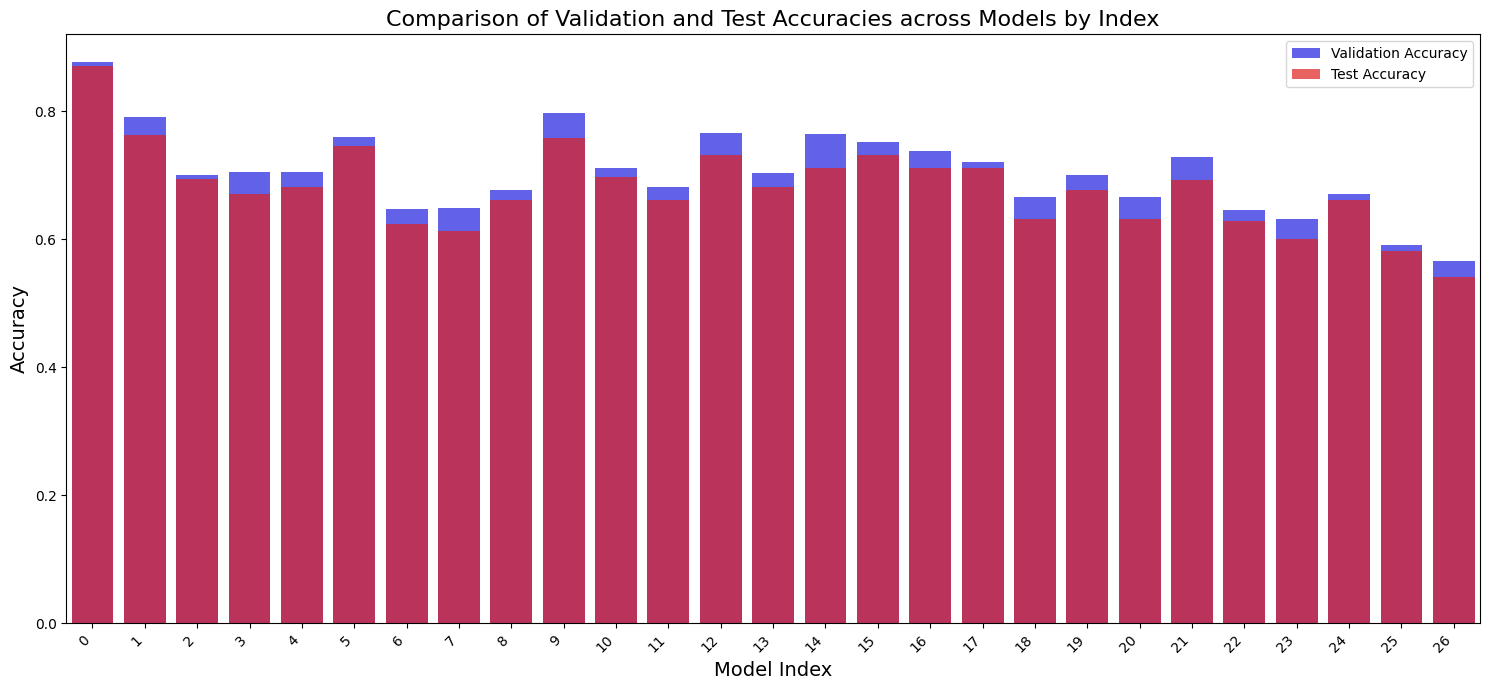

In [2]:
# Importing necessary libraries and reloading the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated CSV file into a DataFrame
updated_result_table = pd.read_csv('ResultTable.csv')

# Plotting the data again
plt.figure(figsize=(15, 7))

# Bar plot for validation accuracy using index
sns.barplot(x=updated_result_table.index, y='Validation-accuracy', data=updated_result_table, color='blue', label='Validation Accuracy', alpha=0.7)

# Bar plot for test accuracy using index
sns.barplot(x=updated_result_table.index, y='Test-accuracy', data=updated_result_table, color='red', label='Test Accuracy', alpha=0.7)

# Setting plot title and labels
plt.title('Comparison of Validation and Test Accuracies across Models by Index', fontsize=16)
plt.xlabel('Model Index', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


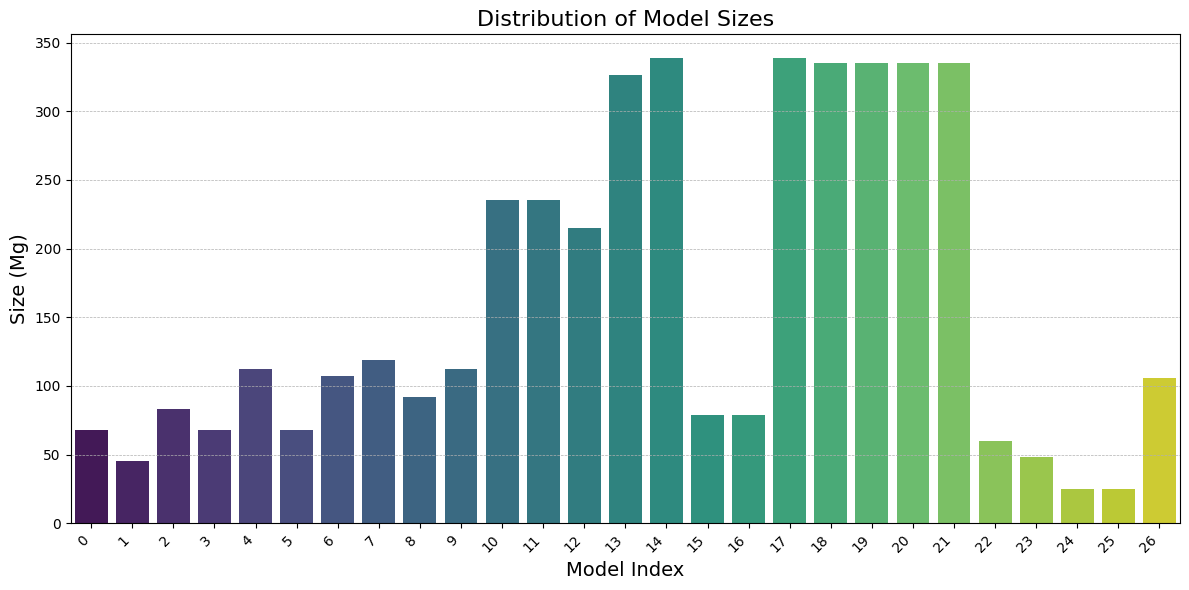

In [3]:
# Extracting the numerical value from the 'Size' column for the bar plot
updated_result_table['Size(Mg)'] = updated_result_table['Size'].str.extract('(\d+)').astype(float)

# Bar plot for Model Size Distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=updated_result_table, x=updated_result_table.index, y='Size(Mg)', palette="viridis")
plt.title('Distribution of Model Sizes', fontsize=16)
plt.xlabel('Model Index', fontsize=14)
plt.ylabel('Size (Mg)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


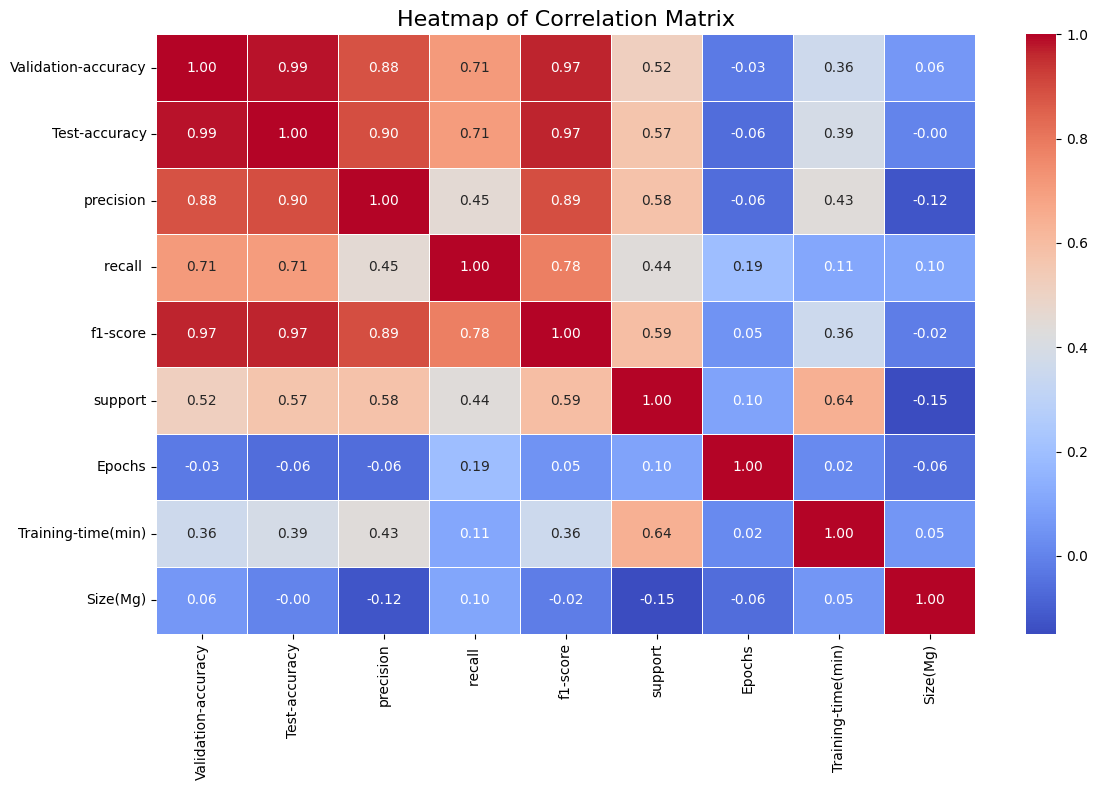

In [8]:
# Extract the 'Training-time' column and convert it to minutes
updated_result_table['Training-time(min)'] = updated_result_table['Training-time'].str.extract('(\d+)').astype(float)
updated_result_table['Training-time(min)'] = updated_result_table['Training-time(min)'].where(updated_result_table['Training-time'].str.contains('min'), updated_result_table['Training-time(min)'] * 60)

# Extract the numerical value from the 'Size' column
updated_result_table['Size(Mg)'] = updated_result_table['Size'].str.extract('(\d+)').astype(float)

# Generate the correlation matrix
correlation_matrix = updated_result_table[['Validation-accuracy', 'Test-accuracy', 'precision', 'recall ', 'f1-score', 'support', 'Epochs', 'Training-time(min)', 'Size(Mg)']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title('Heatmap of Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()







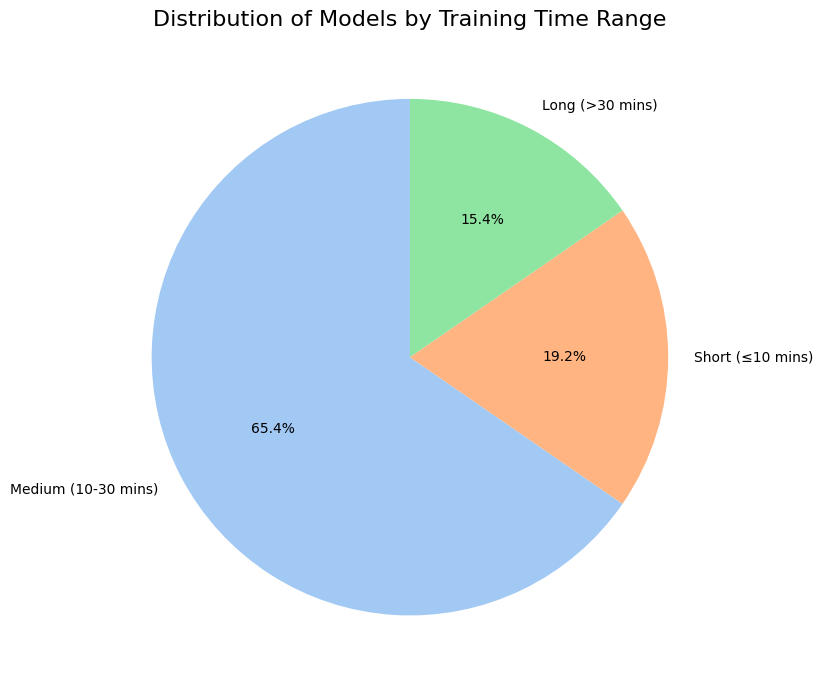

In [9]:
# Categorizing models based on their training time
time_categories = ['Short (≤10 mins)', 'Medium (10-30 mins)', 'Long (>30 mins)']
updated_result_table['Training-time Category'] = pd.cut(updated_result_table['Training-time(min)'], 
                                                        bins=[0, 10, 30, float('inf')], 
                                                        labels=time_categories, 
                                                        right=False)

# Getting the value counts for each category
training_time_distribution = updated_result_table['Training-time Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
training_time_distribution.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel", len(time_categories)))
plt.title('Distribution of Models by Training Time Range', fontsize=16)
plt.ylabel('')  # Hide the y-axis label for aesthetics
plt.tight_layout()
plt.show()
